## Exploring Decision Trees

Decision trees work by splitting the data into *branches*. The branches are followed down to *leaves* where predictions are made. Below is a demonstration of building a decision tree model using cleaned census income dataset. We will try to predict wheter given person earns more than 50K or not.

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_census = pd.read_csv("data/census_cleaned.csv")
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Declare predictor and target columns

X = df_census.iloc[:, :-1]
y = df_census.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=2)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.8131679154894976

*Note*: The `accuracy_score` determines the number of correct predictions divided by the total number of predictions. If 19 of 20 predictions are correct, the `accuracy_score` is 95%.

An accuracy of 81% is comparable to the accuracy of Logistic Regression from the same dataset.

In [6]:
def display_tree(dt):
    from six import StringIO
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydotplus

    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, 
        filled=True, 
        rounded=True, 
        special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())


Now let's try with decision trees of depth 2 and visualize the internal workings of the tree.

In [8]:
tree_clf_dp2 = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf_dp2.fit(X_train, y_train)

y_pred_tree_dp2 = tree_clf_dp2.predict(X_test)

accuracy_score(y_test, y_pred_tree_dp2)

0.8206608524751259

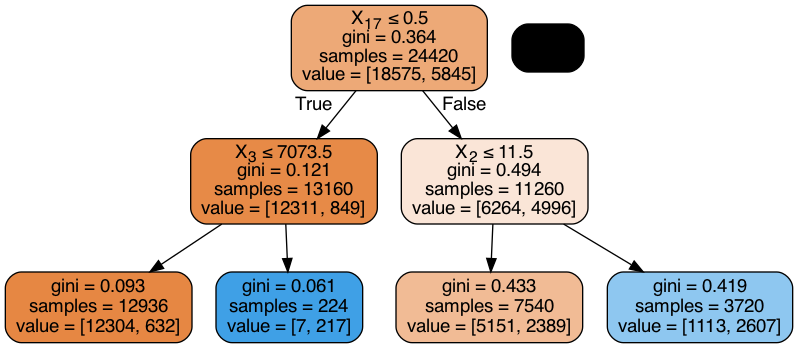

In [10]:
display_tree(tree_clf_dp2)

In [13]:
# Relevant columns:
df_census.columns[[17, 3, 2]]

Index(['marital-status_ Married-civ-spouse', 'capital-gain', 'education-num'], dtype='object')

The top of the tree is the **root**, the **True/False** arrows are branches, and the data points are **nodes**. At the end of the tree, the nodes are classifies as **leaves**. 

**Root:** `marital-status_ Married-civ-spouse` is a binary column, so all values are **0** (negative) or **1** (positive). The first split is based on whether someone is married or not. The left side of the tree is the **True** branch, meaning the user is unmarried.

**Gini Criterion:** Gini index implies how mixed is the dataset. The goal is to find a split that leads to lowest error. A Gini index of 0 means, the set is homogenous and not possible to make any errors. Highest the gini index, the more errors likely to occur due to mixed dataset. Likewisw, a gini index of 0.5 implies an equal distribution of elements, which means predictions are no better than random guessing. `1 - ((18575 / 24420)**2 + (5845 / 24420)**2)`

**Samples, Values, Class:** The root of the tree states that there are 24420 samples, which is the total number of samples in the dataset. The list *[18575, 5845]* indicates that there are 18575 samples have a value of 0 (they make less than 50K), and 5845 have a value of 1 (they make more than 50K). 

**Leaves:** The nodes at the end of the tree are leaves. The leaves contain all final predictions. The far left leaf has a gini index of **0.093**, correctly predicting 12304 of 12936 cases, which is 95%. We are 95% confident that unmarried users with capital gains of less than 7,073.50 do not make more than 50K.

### Tuning Decision Tree Hyperparameters

One of the best machine learning strategies to strike a nice balance between variance and bias is to fine-tune hyperparameters. The best way to learn about hyperparameters is through experimentation. Before selecting hyperparameters, let's start by finding a baseline socre using a *DecisionTreeRegressor*.

In [15]:
# Load bike rentals cleaned version
df_bikes = pd.read_csv("data/bike_rentals_cleaned.csv")
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [16]:
# Determine the predictor and target columns - Target is to predict # of bikes rented for a given day
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]
X_bikes.shape

(731, 12)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt_reg = DecisionTreeRegressor(random_state=2)

scores = cross_val_score(dt_reg, X_bikes, y_bikes, scoring="neg_mean_squared_error", cv=5)

rmse = np.sqrt(-scores)
print(f"RMSE mean: {rmse.mean()}")

RMSE mean: 1233.3556291959644


The RMSE is **1233.35** which is worse than Linear Regression **(972.06)** and XGBoost **(887.31)** obtained in Part1.

- Is the model overfitting the data because the variance is too high? -> To answer this question, inspect how well the decision tree makes predictions on the training set alone.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [56]:
from sklearn.metrics import mean_squared_error

dt_reg_test = DecisionTreeRegressor(random_state=2)
dt_reg_test.fit(X_train, y_train)

y_pred_reg_test = dt_reg_test.predict(X_train)

reg_mse = mean_squared_error(y_train, y_pred_reg_test)
reg_rmse = np.sqrt(reg_mse)

reg_rmse

0.0

The result is **0.0**. A RMSE of 0 means that model has perfectly fit every data point. This perfect score combined with a cross-validation error of 1233.36 is proof that the decision tree is overfitting the data with high variance. 
- The training set fit perfectly, but the test set missed badly. 

We expect fine-tuning hyperparameters to rectify this situation. Important hyperparameters are: `max_depth`, `min_samples_leaf`, `max_leaf_nodes`, `max_features`, `min_samples_split`, `min_impurity_decrease`.

Trying different values for each hyperparameter is a very time consuming job. `GridSearchCV` helps tp reduce this effort by searching a grid of hyperparameters supplied using cross validation to deliver the best results.

*Tip: Generally speaking, decreasing max hyperparameters and increasing min hyperparameters will reduce variation and prevent overfitting.*

1. `max_depth` defines the depth of tree, determined by the number of times splits are made. By default there is no limit to maximum depth, so there may be hundred or thousands of splits that result in overfitting.
    - By limiting max_depth to smaller numbers, variance is reduced, and the model generalizes better to new data.


In [57]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth' : [None, 2, 3, 4, 6, 8, 10, 20]}

tree_reg = DecisionTreeRegressor(random_state=2)

grid_reg = GridSearchCV(tree_reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20]},
             scoring='neg_mean_squared_error')

In [58]:
best_params = grid_reg.best_params_
print(f"Best Params: {best_params}")

best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training score: {best_score}")


Best Params: {'max_depth': 6}
Training score: 951.3984508554636


In [59]:
best_model = grid_reg.best_estimator_

y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test score: {rmse_test}")

Test score: 864.6696975011638


Test score is now slightly improved.

2. `min_samples_leaf` provides a restriction by increasing the number of samples that a leaf may have. As with **max_depth**, it is designed to reduce overfitting.
    - When there are no restrictions, *min_samples_leaf=1* is the default, meaning that leaves may consist of unique samples. (prone to overfitting) Increasing this hyperparameter reduces variance. i.e, if set to 8, all leaves must contain eight or more samples.  

In [60]:
# Create custom grid search function
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    # Fit grid_reg on X_train and y_train
    grid_reg.fit(X_train, y_train)

    # Extract best params
    best_params = grid_reg.best_params_
    print(f"Best Params: {best_params}")

    # Compute the best score
    best_score = np.sqrt(-grid_reg.best_score_)
    print(f"Training score: {best_score}")

    # Predict test set labels
    y_pred = grid_reg.predict(X_test)

    # Compute rmse_test
    rmse_test = mean_squared_error(y_test, y_pred)**0.5
    print(f"Test score: {rmse_test}")



In [61]:
grid_search(params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]})

Best Params: {'min_samples_leaf': 8}
Training score: 896.0830084423535
Test score: 855.6195267278263


Since the test score is better than the training score, variance has been reduced.

**In the hyperparameter tuning process, hyperparameters should not be chosen in isolation.Tuning several parameters together may give different results.**

In [63]:
grid_search(params={'max_depth' : [None, 2, 3, 4, 6, 8, 10, 20], 
                    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]})

Best Params: {'max_depth': 6, 'min_samples_leaf': 2}
Training score: 870.3962060281716
Test score: 912.9995795416623


This result may be a surprise. Even though training score has improved, the test score has not. *min_samples_leaf* has decreased from 8 to 2, while *max_depth* has remained the same. 
- For reducing variance, limiting *min_samples_leaf* to values greater than 3 may help

In [62]:
grid_search(params={'max_depth' : [6, 7, 8, 9, 10], 
                    'min_samples_leaf': [3, 5, 7, 9]})

Best Params: {'max_depth': 9, 'min_samples_leaf': 7}
Training score: 888.9047575735065
Test score: 878.5376183361205


As you can see, the test score has improved.

## Putting All Together

We will study with heart disease dataset to predict if disease exists. Job is to develop a model and highlight two or three important features that doctors can focus on to improve patient health.

- The target column, conveniently labeled `'target'` is binary, with **1** indicating that the patient has heart disease and **0** indicating that they do not.

In [64]:
# Load heart disease dataset and check for nullables
df_heart = pd.read_csv("data/heart_disease.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data types seems fine (no non-numeric data type), also there seems to be no null values exists (all non-null counts are equal amongst columns). To double check:

In [66]:
df_heart.isna().sum().sum()

0

In [67]:
X = df_heart.iloc[:, :-1]
y = df_heart.iloc[:, -1]

X.shape

(303, 13)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

model = DecisionTreeClassifier(random_state=2)
scores = cross_val_score(model, X, y, cv=5)

print(f"Accuracy: {np.round(scores, 2)}")
print(f"Accuracy mean: {scores.mean()}")

Accuracy: [0.74 0.85 0.77 0.73 0.7 ]
Accuracy mean: 0.7587978142076504


Initial accuracy is around 76%. Let's see what gains can be made with hyperparameter fine-tuning.

When fine-tuning many hyperparameters, **GridSearchCV** can take too much time. The scikit-learn library provides **RandomizedSearchCV** as a wonderful alternative. 
- **RandomizedSearchCV** works in the same way as GridSearchCV, but instead of trying all hyperparameters, it tries a random number of combinations.Its meant to find the best combinations in limited time.

In [69]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    
    # Instantiate RandomizedSearchCV as rand_clf
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)

    # Fit rand_clf on X_train and y_train
    rand_clf.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_clf.best_estimator_
    
    # Extract the best score
    best_score = rand_clf.best_score_
    print(f"Training score: {best_score}")

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test score: {accuracy}")

    return best_model

There is no single correct approach for choosing hyperparameters. Experimentation is the name of the game. 

In [70]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.7977777777777777
Test score: 0.8552631578947368


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

This is a definite improvememnt, and the model generalizes well on the test set. Let's see if we can do better by narrowing the range.

- Narrowing the range is one strategy to improve hyperparameters. As an example, using a baseline of **max_depth=8** chosen from the best model, we may narrow the range to from 7 to 9.

- Another strategy is to stop checking hyperparameters whose defaults are working fine. Choosing **gini** as criterion, and *min_impurtiy_decrease* as their default is a good idea. 

In [71]:
randomized_search_clf(params={
    'max_depth':[None, 6, 7],
    'max_features':['auto', 0.78],
    'max_leaf_nodes':[45, None],
    'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
    'min_samples_split':[2, 9, 10],
    'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07],
    },
    runs=100)

Training score: 0.8022222222222222
Test score: 0.868421052631579


DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

This model is more accurate in the training and test score. For a proper baseline of comparison, it's essential to put the new model into **cross_val_clf**. 

In [74]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=0.78, max_leaf_nodes=45,
            min_impurity_decrease=0.0,
            min_samples_leaf=0.045, min_samples_split=9,
            min_weight_fraction_leaf=0.06, random_state=2,
            splitter='best')

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.82 0.9  0.8  0.8  0.78]
Accuracy mean: 0.82


This is 6 percentage points higher than the default model. When it comes to predicting heart disease, more accuracy can save lives.

The final job is to communicate important features find by the model.

- **When testing, it's important not to mix and match training and test sets. After a final model has been selected, however, fitting the model on the entire dataset can be beneficial. Because the goal is to test the model on data that has never been seen and fitting the model on the entire dataset may lead to additional gains in accuracy.**

In [75]:
best_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=0.78, max_leaf_nodes=45,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06,
                       random_state=2, splitter='best')
best_clf.fit(X, y)


DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

In [76]:
best_clf.feature_importances_

array([0.04826754, 0.04081653, 0.48409586, 0.00568635, 0.        ,
       0.        , 0.        , 0.00859483, 0.        , 0.02690379,
       0.        , 0.18069065, 0.20494446])

In [78]:
# Zip columns and feature_importances_ into dict
feature_dict = dict(zip(X.columns, best_clf.feature_importances_))

import operator

# Sort dict by values (as list of tuples)
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.4840958610240171),
 ('thal', 0.20494445570568706),
 ('ca', 0.18069065321397942)]

The three most important features are as follows:

- **cp**: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- **thalach**: Maximum heart rate achieved
- **ca**: Number of major vessels (0-3) colored by fluoroscopy

These numbers may be interpreted as their explanation of variance, so **cp** accounts for 48% of the variance, which is more than **thal** and **ca**.

*As a result, we can communicate that our model predicts if the patient has a heart disease with 82% accuracy using chest pain, maximum heart rate, and fluoroscopy as the three most important characteristics.*